# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---
**Group:** *J*

**Names:**

* *Gankin, Dennis*
* *Zhang, Yuan*
* *Ji, Yipeng*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.2 Network sampling

#### Exercise 2.7: Random walk on the Facebook network

In [3]:
import requests
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Base url of the API
URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
# Target user id
user_id = 'f30ff3966f16ed62f5165a229a19b319'
# The actual url to call 
url = URL_TEMPLATE.format(user_id=user_id)
# Execute the HTTP Get request
response = requests.get(url)
# Format the json response as a Python dict
data = response.json()
print(data['age'])

19


In [5]:
def get_node(user_id):
    # Base url of the API
    URL_TEMPLATE = 'http://iccluster051.iccluster.epfl.ch:5050/v1.0/facebook?user={user_id}'
    # The actual url to call 
    url = URL_TEMPLATE.format(user_id=user_id)
    # Execute the HTTP Get request
    response = requests.get(url)
    # Format the json response as a Python dict
    data = response.json()
    return data

In [40]:
#random walker 
def random_walker(source_node_id, N, print_visited=False):
    temp_node=get_node(source_node_id)
    temp_node_id=source_node_id
    i=0
    age=0
    visited=dict()
    while i<N:
        
        if print_visited:
            visited[temp_node_id] = visited.get(temp_node_id, 0) + 1
        
        age=age+temp_node['age']
        #select next node randomly from freinds/neighbours
        friends=temp_node['friends']
        temp_node_id=random.choice(friends)
        temp_node=get_node(temp_node_id)
        i=i+1
        
    
    #do not allow division by 0 
    if N==0:
        print ("No nodes visited, N=0")
    else :
        av_age=age/N
        print ("average age: ",av_age)
        print ("nodes visited: ", N)
        
        if print_visited:
            width = 0.5     # gives histogram aspect to the bar diagram
            #hide x axis(node_id too long)
            ax = plt.axes()
            ax.set_xticks([])
            
            #list() for python 3
            plt.bar(range(len(list(visited.values()))),list(visited.values()),width=width,color="b")
            plt.show()

In [19]:
i = 500
while i < 7001:
    random_walker(user_id,i)
    i=i+500

average age:  31.398
nodes visited:  500
average age:  23.854
nodes visited:  1000
average age:  22.932
nodes visited:  1500
average age:  23.1305
nodes visited:  2000
average age:  23.0336
nodes visited:  2500
average age:  22.822333333333333
nodes visited:  3000
average age:  22.78514285714286
nodes visited:  3500
average age:  22.26625
nodes visited:  4000
average age:  23.034222222222223
nodes visited:  4500
average age:  23.1962
nodes visited:  5000
average age:  23.559454545454546
nodes visited:  5500
average age:  22.675166666666666
nodes visited:  6000
average age:  23.487384615384617
nodes visited:  6500
average age:  22.629
nodes visited:  7000


the average age seems to converge somewhere around 23 years.

#### Exercise 2.8

average age:  21.724
nodes visited:  500


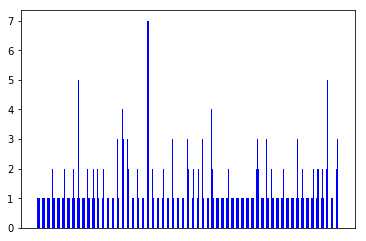

In [42]:
random_walker(user_id,500,print_visited=True)

Our estimation was around 23 years for 7000 nodes. That is very far from the true average of 43.3

Above we see how often each node was visitde during the random walk

We can clearely see that some nodes are visited more than once. So the random walker is often returning to already visited nodes. Those nodes are probably better connected than other and thus more probable to being visited. Thus the walk is biased Of course this destroys the average because well connected nodes weight more than not so well connected ones. 

Thus we could try to only visit nodes that were not visited before.

In [6]:
#random walker 
def random_walker2(source_node_id, N, print_visited=False):
    temp_node=get_node(source_node_id)
    temp_node_id=source_node_id
    i=0
    age=0
    visited=dict()
    age_history=[]
    while i<N:
        
        # only add age if not visited before, and only increment i in that case
        was_visited=False
        if temp_node_id in visited:
            was_visited=True
        
        #TODO: random jump or restarts? --new seeds not alllowed, randomly go backwards or randomly to next node or randomly to visited?, do bigger steps?
        
        #TODO: degree bias, mixing time
        
        
            
        if not was_visited:
            age=age+temp_node['age']
            #add to visited dictionary
            visited[temp_node_id] = visited.get(temp_node_id, 0) + 1
            
        #select next node randomly from freinds/neighbours
        friends=temp_node['friends']
        temp_node_id=random.choice(friends)
        
        tries=0
        threshold=len(friends)*500
        while temp_node_id in visited and threshold>tries:
            temp_node_id=random.choice(friends)
            tries=tries+1 
            #if tries==threshold:
                #print("visited again")
        #print ("found one, tries: ", tries)
        
        temp_node=get_node(temp_node_id)
        
        if not was_visited:
            i=i+1
            
        if i%100==0:
            if len(age_history)== (i/100)-1:
                age_history.append(age/i)
            print ("step: ",i)
            print ("average age: ", age/i)
            
        #make it stop automatically if change in last x nodes was not too big?
        
    
    #do not allow division by 0 
    if N==0:
        print ("No nodes visited, N=0")
    else :
        av_age=age/N
        print ("average age: ",av_age)
        print ("nodes visited: ", N)
        
        if print_visited:
            width = 0.5     # gives histogram aspect to the bar diagram
            #hide x axis(node_id too long)
            ax = plt.axes()
            ax.set_xticks([])
            
            plt.bar(range(len(list(visited.values()))),list(visited.values()),width=width,color="b")
            plt.show()
            plt.plot(age_history)
            plt.show()

step:  100
average age:  24.47
step:  200
average age:  25.205
step:  300
average age:  25.04
step:  400
average age:  24.53
step:  500
average age:  24.514
step:  600
average age:  24.321666666666665
step:  700
average age:  24.117142857142856
step:  700
average age:  24.117142857142856
step:  700
average age:  24.117142857142856
step:  700
average age:  24.117142857142856
step:  800
average age:  23.93375
step:  900
average age:  24.33222222222222
step:  1000
average age:  23.668
step:  1100
average age:  23.74909090909091
step:  1200
average age:  23.6475
step:  1200
average age:  23.6475
step:  1200
average age:  23.6475
step:  1300
average age:  23.322307692307692
step:  1400
average age:  23.535714285714285
step:  1500
average age:  23.462666666666667
step:  1600
average age:  23.455625
step:  1700
average age:  23.748823529411766
step:  1800
average age:  23.80388888888889
step:  1900
average age:  23.611052631578946
step:  2000
average age:  23.3695
step:  2100
average age:  23

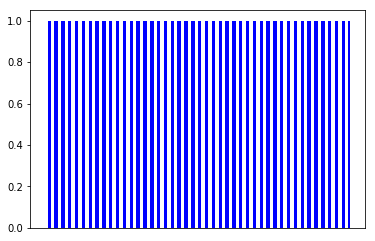

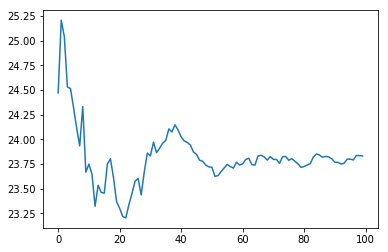

In [7]:
random_walker2(user_id,10000, print_visited=True)

Not counting visited nodes more than twice or more times is obviously not enough, the average age is still far away from the true one. The random walk visits well connected younger people with a higher probability.  

One could pick an approach similar to snowball sapmling. Try to find out how a small part of the graph looks like. Compute importance of each node and weight the less important nodes more